<a href="https://colab.research.google.com/github/pritkudale/Code_for_LinkedIn/blob/main/logistic_regression_detailed_animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-68bf4e3404d8>:206: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


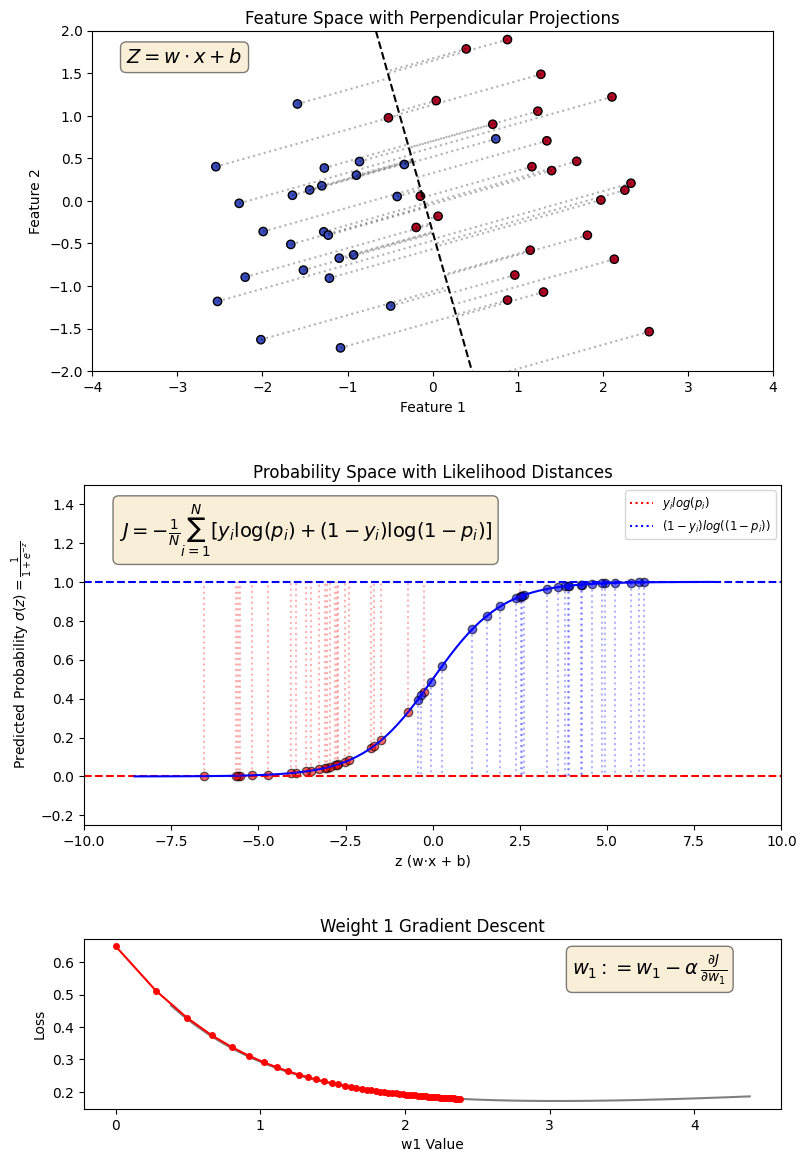

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_classification

# Generate sample data
X, y = make_classification(n_samples=50, n_features=2, n_redundant=0,
                           n_informative=1, random_state=0, n_clusters_per_class=1)

# Initialize parameters with horizontal starting boundary
w = np.array([0.0, 1.0])  # decision boundary: w[0]*x + w[1]*y + b = 0
b = 0.0
lr = 0.5

# For the gradient descent subplot we will store the parameter history
w1_history = [w[0]]
init_params = np.array([w[0], w[1], b])

def calc_loss_single(val, param_idx, fixed_params):
    """Compute logistic regression loss when varying one parameter (given by val)
    and holding the other two fixed as in fixed_params."""
    temp = fixed_params.copy()
    temp[param_idx] = val
    z = X.dot(temp[:2]) + temp[2]
    y_pred = 1 / (1 + np.exp(-z))
    loss = -np.mean(y * np.log(y_pred + 1e-10) + (1 - y) * np.log(1 - y_pred + 1e-10))
    return loss

w1_loss_history = [calc_loss_single(w[0], 0, init_params)]
loss_history_training = []  # overall training loss (for the probability plot)

# Create figure with custom layout.
fig = plt.figure(figsize=(9, 14))
gs = fig.add_gridspec(3, 3, height_ratios=[2, 2, 1], hspace=0.4, wspace=0.3)

# -----------------------------
# Plot 1: Classification plot
ax1 = fig.add_subplot(gs[0, :])
ax1.set_title("Feature Space with Perpendicular Projections", pad=5)
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")
ax1.set_xlim(-4, 4)
ax1.set_ylim(-2, 2)
ax1.set_aspect('equal')
# Add formula text for calculating Z
ax1.text(0.05, 0.95, r"$Z = w\cdot x + b$",
         transform=ax1.transAxes, fontsize=14, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))

# -----------------------------
# Plot 2: Probability plot
ax2 = fig.add_subplot(gs[1, :])
ax2.set_title("Probability Space with Likelihood Distances", pad=5)
ax2.set_xlabel("z (w·x + b)")
ax2.set_ylabel(r"Predicted Probability $\sigma(z) = \frac{1}{1 + e^{-z}}$")
ax2.set_xlim(-10, 10)
ax2.set_ylim(-0.25, 1.5)
# Draw horizontal lines for the target probability boundaries:
ax2.axhline(0, color='red', linestyle='--', label='Class 0 Boundary')
ax2.axhline(1, color='blue', linestyle='--', label='Class 1 Boundary')
# Add formula text for Maximum Likelihood (negative log–likelihood)
ax2.text(0.05, 0.95,
         r"$J = -\frac{1}{N}\sum_{i=1}^{N}\left[y_i\log(p_i) + (1-y_i)\log(1-p_i)\right]$",
         transform=ax2.transAxes, fontsize=14, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))

# --- Add likelihood formulas as annotations ---

legend_labels = ['$y_i log(p_i)$', '$(1-y_i) log((1-p_i))$']
legend_handles = [plt.Line2D([0], [0], color='red', linestyle=':'),
                  plt.Line2D([0], [0], color='blue', linestyle=':')]
ax2.legend(legend_handles,legend_labels,fontsize='small')


# -----------------------------
# Plot 3: Gradient Descent plot for weight 1
ax3 = fig.add_subplot(gs[2, :])
ax3.set_title("Weight 1 Gradient Descent", pad=5)
ax3.set_xlabel("w1 Value")
ax3.set_ylabel("Loss")
# Add formula text for gradient descent update for w1
ax3.text(0.7, 0.92,
         r"$w_1 := w_1 - \alpha\,\frac{\partial J}{\partial w_1}$",
         transform=ax3.transAxes, fontsize=14, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))

# -----------------------------
# Initialize plot elements

# --- Plot 1: Data and decision boundary ---
scat = ax1.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
line, = ax1.plot([], [], 'k--')
proj_lines = [ax1.plot([], [], 'k:', alpha=0.3)[0] for _ in range(len(X))]

# --- Plot 2: Sigmoid curve and scatter points ---
sigmoid_line, = ax2.plot([], [], 'b-', label='Sigmoid')
scatter_prob0 = ax2.scatter([], [], color='red', edgecolors='k', alpha=0.6, label='Class 0 Point')
scatter_prob1 = ax2.scatter([], [], color='blue', edgecolors='k', alpha=0.6, label='Class 1 Point')
likelihood_lines = [ax2.plot([], [], 'k:', alpha=0.3)[0] for _ in range(len(X))]

# --- Plot 3: Continuous loss curve and discrete gradient descent path for weight 1 ---
w1_curve, = ax3.plot([], [], 'k-', alpha=0.5)
w1_path, = ax3.plot([], [], 'ro-', markersize=4)

# -----------------------------
def calculate_loss(param_values, param_idx, fixed_params):
    """Calculate loss for a range of values for one parameter while keeping others fixed."""
    losses = []
    for val in param_values:
        temp = fixed_params.copy()
        temp[param_idx] = val
        z = X.dot(temp[:2]) + temp[2]
        y_pred = 1 / (1 + np.exp(-z))
        loss = -np.mean(y * np.log(y_pred + 1e-10) + (1 - y) * np.log(1 - y_pred + 1e-10))
        losses.append(loss)
    return np.array(losses)

def update_projections(w, b):
    """Calculate perpendicular projections of data points onto the decision boundary."""
    projections = []
    w_norm = np.linalg.norm(w)
    for point in X:
        distance = (np.dot(w, point) + b) / w_norm
        projection = point - distance * w / w_norm
        projections.append(projection)
    return projections

def animate(i):
    global w, b
    # --- Plot 2: Compute predictions and overall training loss ---
    z_all = X.dot(w) + b
    y_pred = 1 / (1 + np.exp(-z_all))
    train_loss = -np.mean(y * np.log(y_pred + 1e-10) + (1 - y) * np.log(1 - y_pred + 1e-10))
    loss_history_training.append(train_loss)

    # --- Gradient descent update (for overall training) ---
    dw = np.mean((y_pred - y)[:, None] * X, axis=0)
    db_val = np.mean(y_pred - y)
    w = w - lr * dw
    b = b - lr * db_val

    # Use the updated parameters as the new fixed point for the loss functions.
    current_params = np.array([w[0], w[1], b])

    # Compute discrete loss value for weight 1 from the continuous loss function:
    current_loss_w1 = calc_loss_single(w[0], 0, current_params)

    # Append new discrete points (so the discrete path follows the continuous curve)
    w1_history.append(w[0])
    w1_loss_history.append(current_loss_w1)

    # --- Update Plot 1: Classification plot ---
    x_lim = np.array(ax1.get_xlim())
    # Decision boundary: w[0]*x + w[1]*y + b = 0  =>  y = (-w[0]/w[1])*x - b/w[1]
    y_lim = (-w[0] / w[1]) * x_lim - b / w[1]
    line.set_data(x_lim, y_lim)

    projections = update_projections(w, b)
    for j, (point, proj) in enumerate(zip(X, projections)):
        proj_lines[j].set_data([point[0], proj[0]], [point[1], proj[1]])

    # --- Update Plot 2: Probability plot ---
    # Sigmoid curve over a range of z:
    z_min, z_max = z_all.min() - 2, z_all.max() + 2
    z_range = np.linspace(z_min, z_max, 100)
    sigmoid_vals = 1 / (1 + np.exp(-z_range))
    sigmoid_line.set_data(z_range, sigmoid_vals)

    # Split data points by true label:
    mask0 = (y == 0)
    mask1 = (y == 1)
    offsets0 = np.column_stack((z_all[mask0], y_pred[mask0]))
    offsets1 = np.column_stack((z_all[mask1], y_pred[mask1]))
    scatter_prob0.set_offsets(offsets0)
    scatter_prob1.set_offsets(offsets1)

    # Draw likelihood (dotted) lines connecting predicted probability to the target value:
    for j, (z_val, pred_val, true_val) in enumerate(zip(z_all, y_pred, y)):
        if true_val == 0:
            likelihood_lines[j].set_data([z_val, z_val], [pred_val, 1])
            likelihood_lines[j].set_color('red')
        else:
            likelihood_lines[j].set_data([z_val, z_val], [pred_val, 0])
            likelihood_lines[j].set_color('blue')

    # --- Update Plot 3: Gradient descent curve for weight 1 ---
    # Compute a continuous loss curve by varying weight 1 while keeping others fixed.
    w1_range = np.linspace(current_params[0] - 2, current_params[0] + 2, 50)
    w1_curve_loss = calculate_loss(w1_range, 0, current_params)
    w1_curve.set_data(w1_range, w1_curve_loss)

    # Update the discrete path markers so they lie on the same continuous loss curve.
    w1_path.set_data(w1_history, w1_loss_history)

    # Rescale the gradient descent subplot to fit new data.
    ax3.relim()
    ax3.autoscale_view()

    # Return all modified artists for blitting.
    artists = [line] + proj_lines + [sigmoid_line, scatter_prob0, scatter_prob1] + likelihood_lines + [w1_curve, w1_path]
    return artists

ani = FuncAnimation(fig, animate, frames=50, interval=500, blit=True)
ani.save('gradient_descent_animation.gif', writer='pillow')

plt.tight_layout()
plt.show()
